<a href="https://colab.research.google.com/github/mwinzie/Financial-Outcomes/blob/master/Moringa_Data_Science_Core_W1_Independent_Project_2019_08_Agnes_Mueni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Research Question

The research problem is to figure out how we can predict which individuals are most likely to have or use a bank account. Your solution will help provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda, while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



In [0]:
#importing the pandas library
import pandas as pd

# Importing Numpy
import numpy as np

# Importing Matplotlib
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns
%matplotlib inline



In [3]:
#installing the researchpy
pip install researchpy

## Reading the dataset

In [0]:
#loading the dataset

economic = pd.read_csv('Financial Dataset.csv')


## **Checking the Dataset**

In [73]:
# Determining the no. of records in our dataset
#
print('This dataset has ' + str(economic.shape[0]) + ' rows, and ' + str(economic.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns


In [110]:
# Previewing the top of the dataset
economic.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [76]:
# Previewing the bottom of the dataset
economic.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [77]:
# Checking whether each column has an appropriate datatype
economic.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

## Tidying the Dataset

AxesSubplot(0.125,0.125;0.775x0.755)


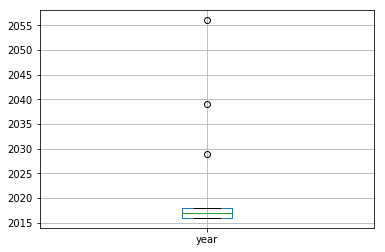

In [136]:
#Checking the dataset for outliers

print(economic.boxplot(["year"]))
print(economic.boxplot([""]))

In [113]:
# Checking for Anomalies
#replacing ' '(space) with '_'
economic.columns = economic.columns.str.strip().str.replace(' ','_')
economic.columns

Index(['country', 'year', 'uniqueid', 'Has_a_Bank_account', 'Type_of_Location',
       'Cell_Phone_Access', 'household_size', 'Respondent_Age',
       'gender_of_respondent', 'The_relathip_with_head', 'marital_status',
       'Level_of_Educuation', 'Type_of_Job'],
      dtype='object')

In [114]:
#changing all columns names to lower case 
economic.columns = map(str.lower, economic.columns)
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

In [115]:
#renaming column names 
economic.rename(columns= {'the_relathip_with_head':'relationship_with_head', 'level_of_educuation':'level_of _education'}, inplace = True)
economic.columns

Index(['country', 'year', 'uniqueid', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'relationship_with_head', 'marital_status',
       'level_of _education', 'type_of_job'],
      dtype='object')

In [0]:
#dropping the rows that are unnecessary 
economic.drop(['uniqueid'], axis = 1, inplace = True)

In [117]:
# Dealing with the Missing Data
#checking for null values
economic.isna().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
relationship_with_head     4
marital_status            32
level_of _education       29
type_of_job               30
dtype: int64

In [118]:
#dropping all null values
neweconomic = economic.dropna()
neweconomic.head()

,country,year,has_a_bank_account,type_of_location,cell_phone_access,household_size,respondent_age,gender_of_respondent,relationship_with_head,marital_status,level_of _education,type_of_job
0,Kenya,2018,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [119]:
neweconomic.shape

(23343, 12)

In [120]:
#checking for all unique values in the dataset
for i in neweconomic.columns:
  print('\n')
  print(neweconomic[i].unique())



['Kenya' 'Rwanda' 'Tanzania' 'Uganda']


[2018 2029 2056 2016 2039 2017]


['Yes' 'No']


['Rural' 'Urban']


['Yes' 'No']


[ 3.  5.  8.  7.  1.  6.  4. 10.  2. 11.  9. 12. 16. 15. 13. 14. 21.  0.
 18. 17. 20.]


[ 24.  70.  26.  34.  32.  42.  54.  76.  40.  69.  64.  31.  38.  47.
  27.  48.  25.  21.  18.  22.  58.  55.  62.  29.  35.  45.  67.  19.
  80.  66.  50.  33.  28.  51.  16.  17.  30.  37.  59.  65.  46.  56.
  52.  23.  43.  49.  44.  72.  53.  63.  39.  81.  78.  36.  20.  60.
  95.  71.  57.  85.  68.  41.  61.  75.  86.  73.  93.  74.  88.  90.
  77.  84.  82.  89.  79.  83.  94.  87.  92.  91.  98.  97.  96.  99.
 100.]


['Female' 'Male']


['Spouse' 'Head of Household' 'Other relative' 'Child' 'Parent'
 'Other non-relatives']


['Married/Living together' 'Widowed' 'Single/Never Married'
 'Divorced/Seperated' 'Dont know']


['Secondary education' 'No formal education'
 'Vocational/Specialised training' 'Primary education'
 'Tertiary education' 'Other/Dont know/RTA

In [0]:
#dropping the years that do not fall under the research study
#assigning the variable x to years 
x = neweconomic[neweconomic['year'] > 2018].index
neweconomic.drop(x, inplace = True)


In [122]:
neweconomic.year.unique()

array([2018, 2016, 2017])

In [123]:
neweconomic.shape

(23340, 12)

In [124]:
# More data cleaning procedures
#
neweconomic.describe()

,year,household_size,respondent_age
count,23340.000000,23340.000000,23340.000000
mean,2016.977464,3.688560,38.807069
std,0.849136,2.281275,16.519905
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


## Exploratory Analysis